# Coding with Qiskit
Following the [Qiskit video tutorials](https://www.youtube.com/watch?v=RrUTwq5jKM4&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)

## Installing Qiskit
[How to Install Qiskit — Programming on Quantum Computers Ep 2
](https://www.youtube.com/watch?v=M4EkW4VwhcI&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=2)

In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.3'}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Hello World
[Hello World — Programming on Quantum Computers Ep 3](https://www.youtube.com/watch?v=RrUTwq5jKM4&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=3)

Creating a quantum circuit and simulating it

In [5]:
from qiskit import *

In [6]:
qr = QuantumRegister(2)

In [7]:
cr = ClassicalRegister(2)

In [16]:
circuit = QuantumCircuit(qr, cr)

In [17]:
%matplotlib inline

In [18]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

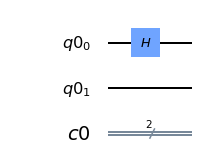

In [19]:
circuit.h(qr[0])
circuit.draw(output='mpl')

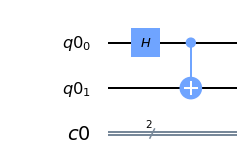

In [20]:
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

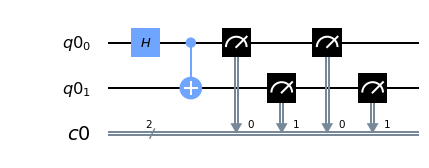

In [37]:
circuit.measure(qr, cr)
circuit.draw(output='mpl')

### Simulation

In [24]:
simulator = Aer.get_backend('qasm_simulator')

In [26]:
result = execute(circuit, backend=simulator).result()

In [27]:
from qiskit.tools.visualization import plot_histogram

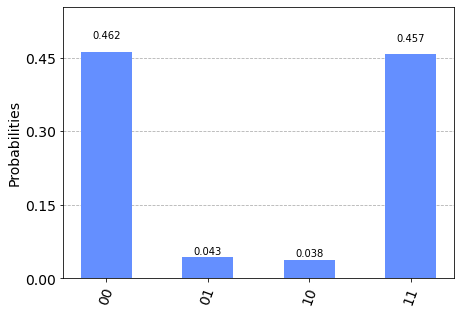

In [36]:
plot_histogram(result.get_counts(circuit))

### Real Quantum Computer run

In [29]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-11 00:42:43,999: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [30]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_london')

In [31]:
job = execute(circuit, backend=qcomp)

In [32]:
from qiskit.tools.monitor import job_monitor

In [33]:
job_monitor(job)

Job Status: job has successfully run


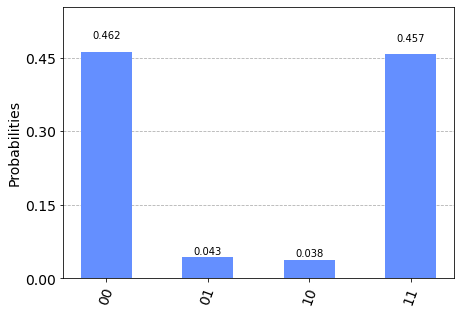

In [34]:
result = job.result()
plot_histogram(result.get_counts(circuit))

## Building blocks
[Building Blocks of Quantum Circuits — Programming on Quantum Computers Ep 4](https://www.youtube.com/watch?v=tBnWG_95F9c&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=4)

Illustration of the different representations of a circuit block through the example of the X-block

In [53]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram

### State Vector representation on Bloch sphere

[0.+0.j 1.+0.j]


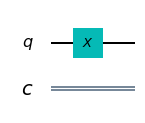

In [54]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
%matplotlib inline
circuit.draw(output='mpl')

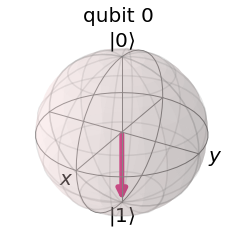

In [55]:
plot_bloch_multivector(statevector)

### Measures representation

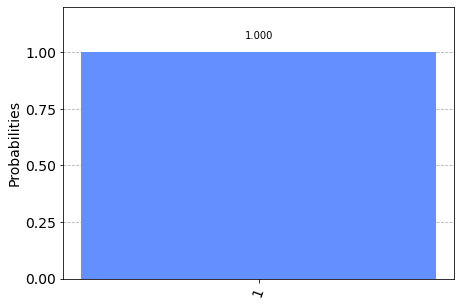

In [56]:
circuit.measure([0], [0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts())

### Matrix representation

In [59]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend=simulator).result()
unitaryvector = result.get_unitary()
print(unitaryvector)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


## Quantum Teleportation
[Quantum Teleportation Algorithm — Programming on Quantum Computers Ep 5
](https://www.youtube.com/watch?v=mMwovHK2NrE&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=5)